In [1]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 생략(무시)
warnings.filterwarnings('ignore')

# 그래프에서 한글처리 문제 해결
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 그래프에서 음수(minus) 기호 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1, 2]]
df2 = df2.drop('남북한별', axis = 'columns')
df2 = df2.rename({'발전 전력별':'전력별'}, axis = 'columns')
df2 = df2.set_index('전력별')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(int)
df2_T

전력별,수력,화력
1990,156,121
1991,150,113
1992,142,105
1993,133,88
1994,138,93
1995,142,88
1996,125,88
1997,107,86
1998,102,68
1999,103,83


In [3]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1, 2], '1990':'2016']
df2 = df2.rename({1:'수력', 2:'화력'}, axis = 'index')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(str)

df2_T['합계'] = df2_T['수력'] + df2_T['화력']
df2_T['합계-1년'] = df2_T['합계'].shift(1)
df2_T['증감률'] = ((df2_T['합계'] - df2_T['합계-1년']) / df2_T['합계-1년']) * 100
df2_T.head(3)

,수력,화력,합계,합계-1년,증감률
1990,156,121,277,NaN,NaN
1991,150,113,263,277.0,-5.054152
1992,142,105,247,263.0,-6.083650


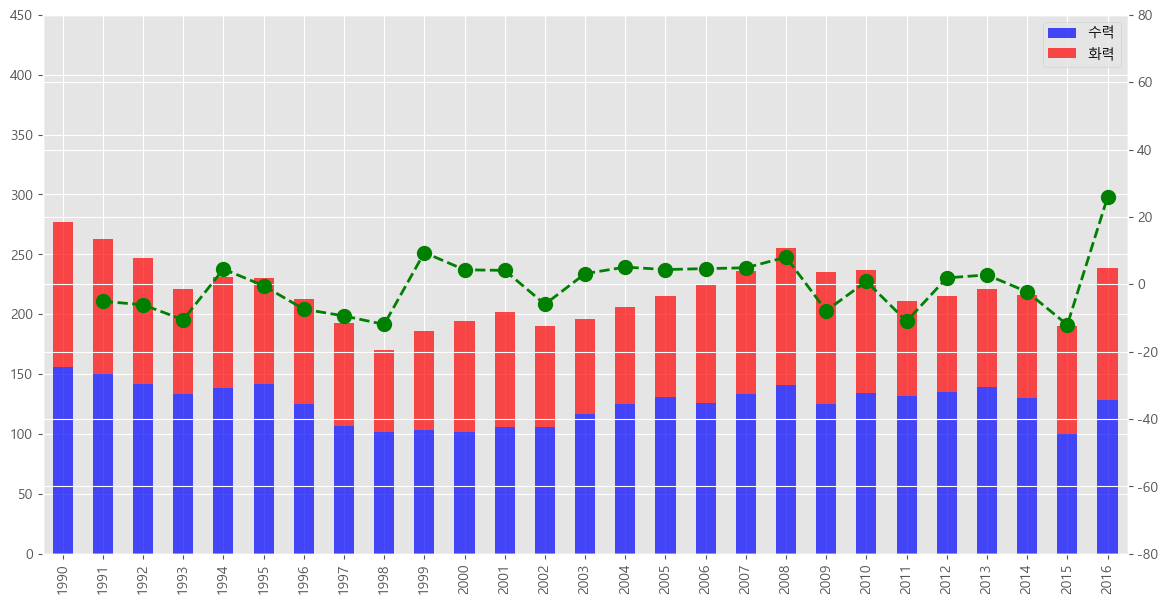

In [4]:
plt.style.use('ggplot')

ax1 = df2_T[['수력', '화력']].plot(kind = 'bar', figsize = (14, 7), stacked = True,
                                   color = ['blue', 'red'], alpha = 0.7)
ax2 = ax1.twinx()
ax2.plot(df2_T['증감률'], ls = '--', marker = 'o', color = 'green', linewidth = 2,
         markersize = 10)
ax1.set_ylim(0, 450)
ax2.set_ylim(-80, 80)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

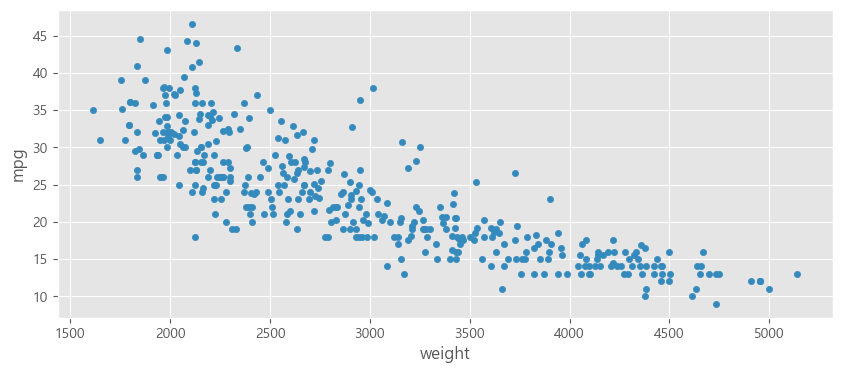

In [5]:
car = pd.read_csv('csv/auto-mpg.csv')
car.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10, 4))

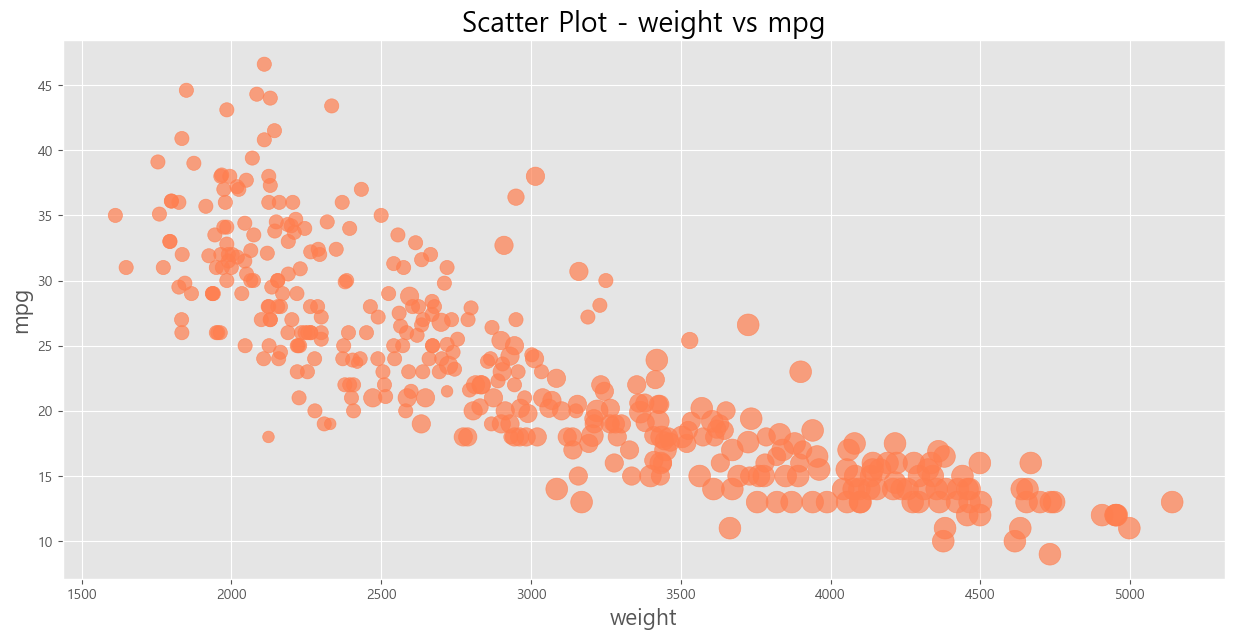

In [6]:
cyl_size = (car['cylinders'] - 1) * 35

plt.figure(figsize = (15, 7))
plt.scatter(x = car['weight'], y = car['mpg'], c = 'coral',s = cyl_size, alpha = 0.7)
plt.xlabel('weight', size = 16)
plt.ylabel('mpg', size= 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)
plt.show()

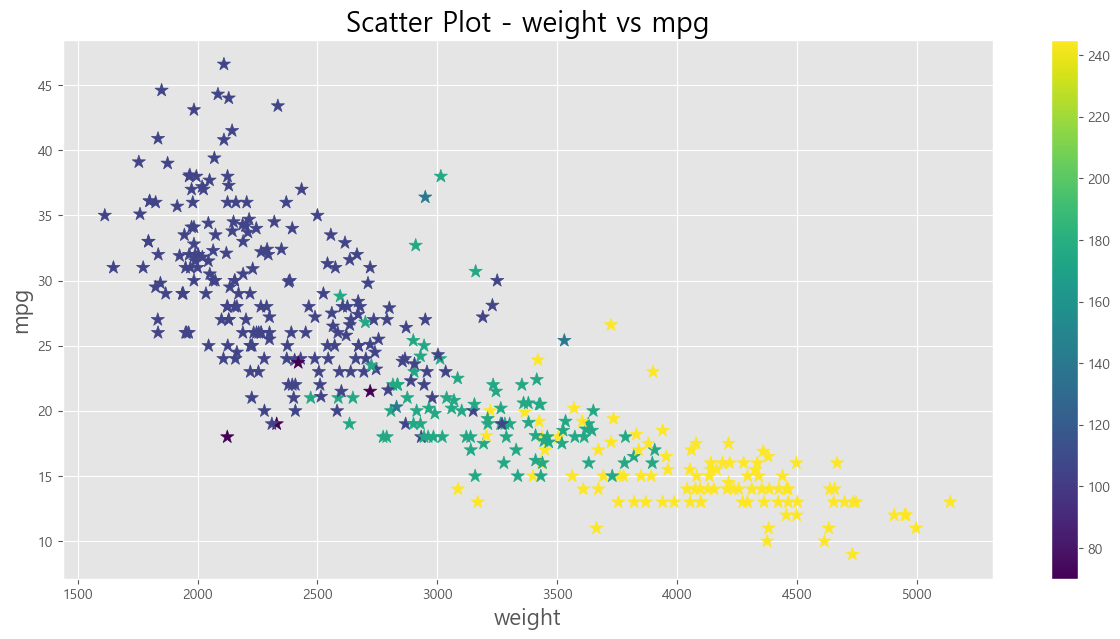

In [19]:
cyl_size = (car['cylinders'] - 1) * 35

plt.figure(figsize = (15, 7))
plt.scatter(x = car['weight'], y = car['mpg'], marker = '*', s = 100,
            cmap = 'viridis', c = cyl_size)            
plt.xlabel('weight', size = 16)
plt.ylabel('mpg', size= 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)

plt.colorbar()
plt.show()

In [20]:
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
# 빈도 구하고 그걸로 pie chart 그리기
car2 = car.copy()
car2['count']=1

In [25]:
car2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,count
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1


In [31]:
car2.groupby('origin')['count'].sum()
car2.groupby('origin')['count'].sum() / len(car2.index)

origin
1    0.625628
2    0.175879
3    0.198492
Name: count, dtype: float64

In [30]:
car2['origin'].value_counts() # 이렇게 구하는게 더 쉽다.

origin
1    249
3     79
2     70
Name: count, dtype: int64

<Axes: ylabel='count'>

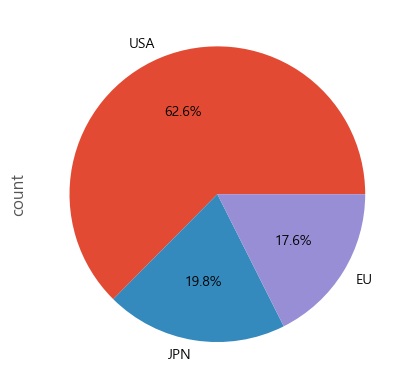

In [40]:
car_origin = car2['origin'].value_counts()
car_origin = car_origin.rename({1:'USA',2:'EU',3:'JPN'})
car_origin.plot(kind = 'pie', autopct = '%.1f%%')


(-1.0999986817895158,
 1.099996980876303,
 -1.0999952404369981,
 1.0999979640071504)

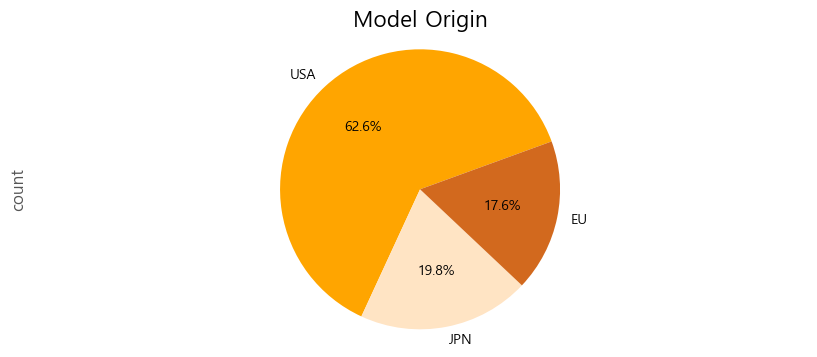

In [53]:
car_origin.plot(kind = 'pie', autopct = '%.1f%%',figsize = (10,4),
                startangle = 20,colors = ['orange','bisque','chocolate'])
plt.title('Model Origin',size = 16)
plt.axis('equal')

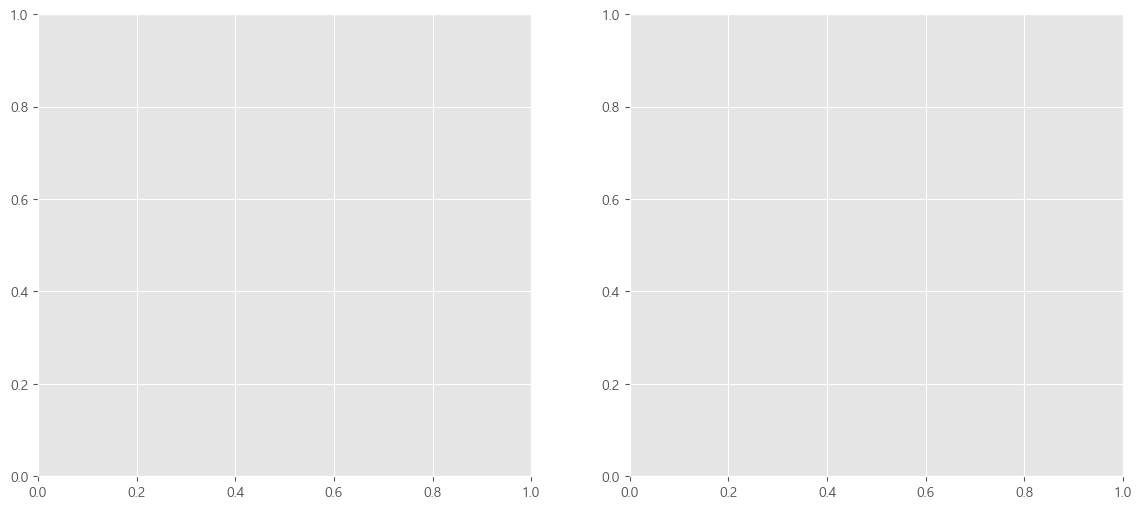

In [54]:
# 박스플롯 145
figure = plt.figure(figsize = (14,6))
ax1 = figure.add_subplot(1,2,1) # 1행 2열의 1번째
ax2 = figure.add_subplot(1,2,2) 

<Axes: >

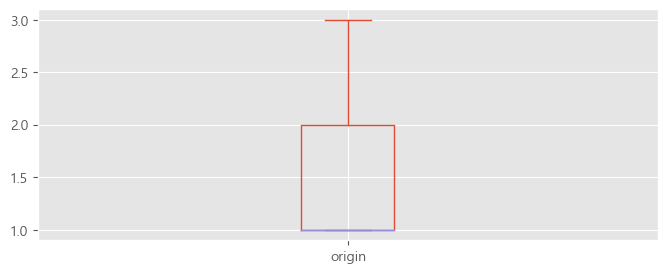

In [56]:
car['origin'].plot(kind = 'box', figsize = (8,3))

In [61]:
# plt.boxplot(x = [1,2,3]) 한개내에 같이 나오게 하려면 matplotlib에서 이런식으로 해야 한다.

sr5 = car['origin'][100:120]
[sr5[sr5 == 3],sr5[sr5 == 2]]

[108    3
 110    3
 111    3
 Name: origin, dtype: int64,
 102    2
 114    2
 117    2
 118    2
 119    2
 Name: origin, dtype: int64]

In [63]:
mask_usa   = car['origin']==1
origin_usa = car['origin'][mask_usa]
origin_usa

0      1
1      1
2      1
3      1
4      1
      ..
392    1
393    1
395    1
396    1
397    1
Name: origin, Length: 249, dtype: int64

In [70]:
#또는
origin_usa = car['mpg'][car['origin'] ==1 ]
origin_eu  = car['mpg'][car['origin'] ==2 ]
origin_jpn = car['mpg'][car['origin'] ==3 ]
origin_list = [origin_usa, origin_eu, origin_jpn]
origin_list

[0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    27.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 249, dtype: float64,
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
        ... 
 354    34.5
 359    28.1
 360    30.7
 375    36.0
 394    44.0
 Name: mpg, Length: 70, dtype: float64,
 14     24.0
 18     27.0
 29     27.0
 31     25.0
 53     31.0
        ... 
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 390    32.0
 Name: mpg, Length: 79, dtype: float64]

Text(0.5, 1.0, '제조국가별 연비분포(수평 boxplot)')

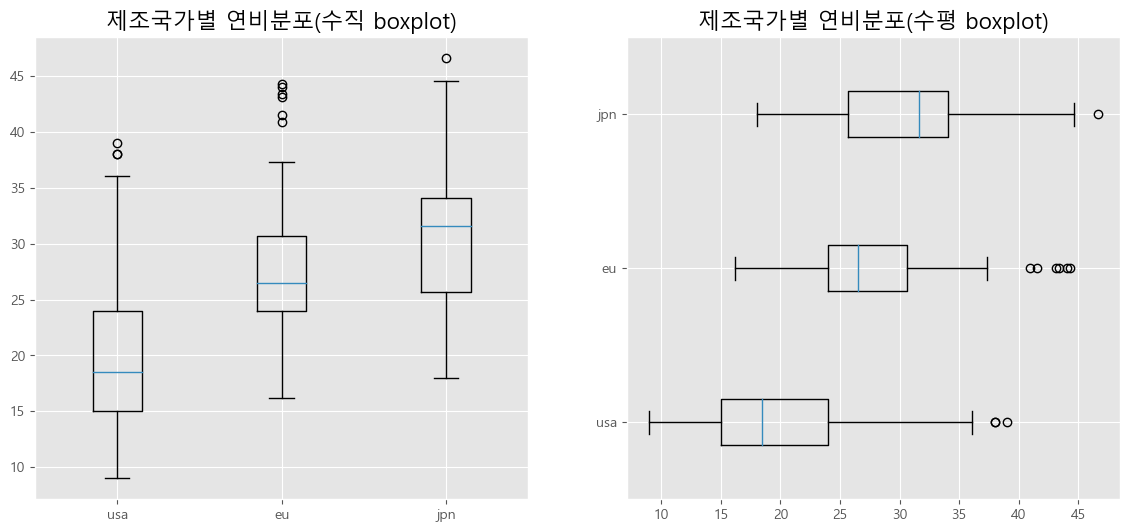

In [77]:
figure = plt.figure(figsize = (14,6))
# origin 컬럼을 국가별로 나누어 목록화
mpg_usa = car['mpg'][car['origin'] ==1 ]
mpg_eu  = car['mpg'][car['origin'] ==2 ]
mpg_jpn = car['mpg'][car['origin'] ==3 ]
mpg_list = [mpg_usa, mpg_eu, mpg_jpn]

ax1 = figure.add_subplot(1,2,1) # 1행 2열의 1번째
ax2 = figure.add_subplot(1,2,2) 

ax1.boxplot(x=origin_list, vert = True  ,labels = ['usa','eu','jpn'] )
ax2.boxplot(x=origin_list, vert = False ,labels = ['usa','eu','jpn'] )

ax1.set_title('제조국가별 연비분포(수직 boxplot)', size = 16)
ax2.set_title('제조국가별 연비분포(수평 boxplot)', size = 16)